# Homework #1 Possible Solutions

This notebook shows one possible set of solutions to Homework #1 by Kevin.  You may have found alternative solutions that are equally valid or more computationally efficient. 

First let's import our libraries:

In [31]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# nicely render figures in the notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
plt.rcParams['font.family'] = 'Helvetica'

## Simple covariance of two small samples

Suppose I have two populations, $X$ and $Y$, which vary in time.  I have a sample of each - a time series - we will call $x$ and $y$.  Each of these time series is a vector.  Given those two vectors below, calculate their covariance using only basic matrix operations. 

In [32]:
x = np.array([-4, -1, 1, 3, 1, 6])
y = np.array([-4, 2, -1, 2, 2, 5])

cov_xy = ((x-x.mean()) @ (y.T-y.T.mean())) * 1/(len(x)-1)
print(cov_xy)

9.0


Now, having done the calculation without the benefit of functions, we use the  NumPy built-in function `numpy.cov` to calculate their covariance.  

In [33]:
np.cov(x,y)

array([[11.6,  9. ],
       [ 9. ,  9.6]])

Instead of a single covariance value, we get a matrix. The off-diagonal elements of the matrix are the covariance of $x$ and $y$, while the diagonal elements of the covariance matrix are the variance of x and y, respectively.

## Iris dataset

Load the Iris dataset `iris.data` into the workspace.  Although from the early 20th century, this dataset is still widely used for examples in machine learning, pattern recognition, and classification.  It can be acquired in its original form here, with metadata: https://archive.ics.uci.edu/ml/datasets/Iris.  It consists of four different (but related) measurements on multiple individuals from three different species of _Iris_: sepal length, sepal width, petal length, and petal width.  I use Pandas to read this data into a DataFrame.

In [34]:
df = pd.read_csv('iris.data') # use Pandas to read in the csv data
df #let's look at our Pandas dataframe


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species(id)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



Once you have loaded the dataset into your notebook, use Matplotlib to create a 4 by 4 figure (16 subplots total) with each of the 4 measurement variables plotted against each one of the others (so, sepal length against sepal width, sepal length against petal length, etc. etc.).  If you wish, along the diagonal subplots of your figure you can plot a histogram of each the data series. 


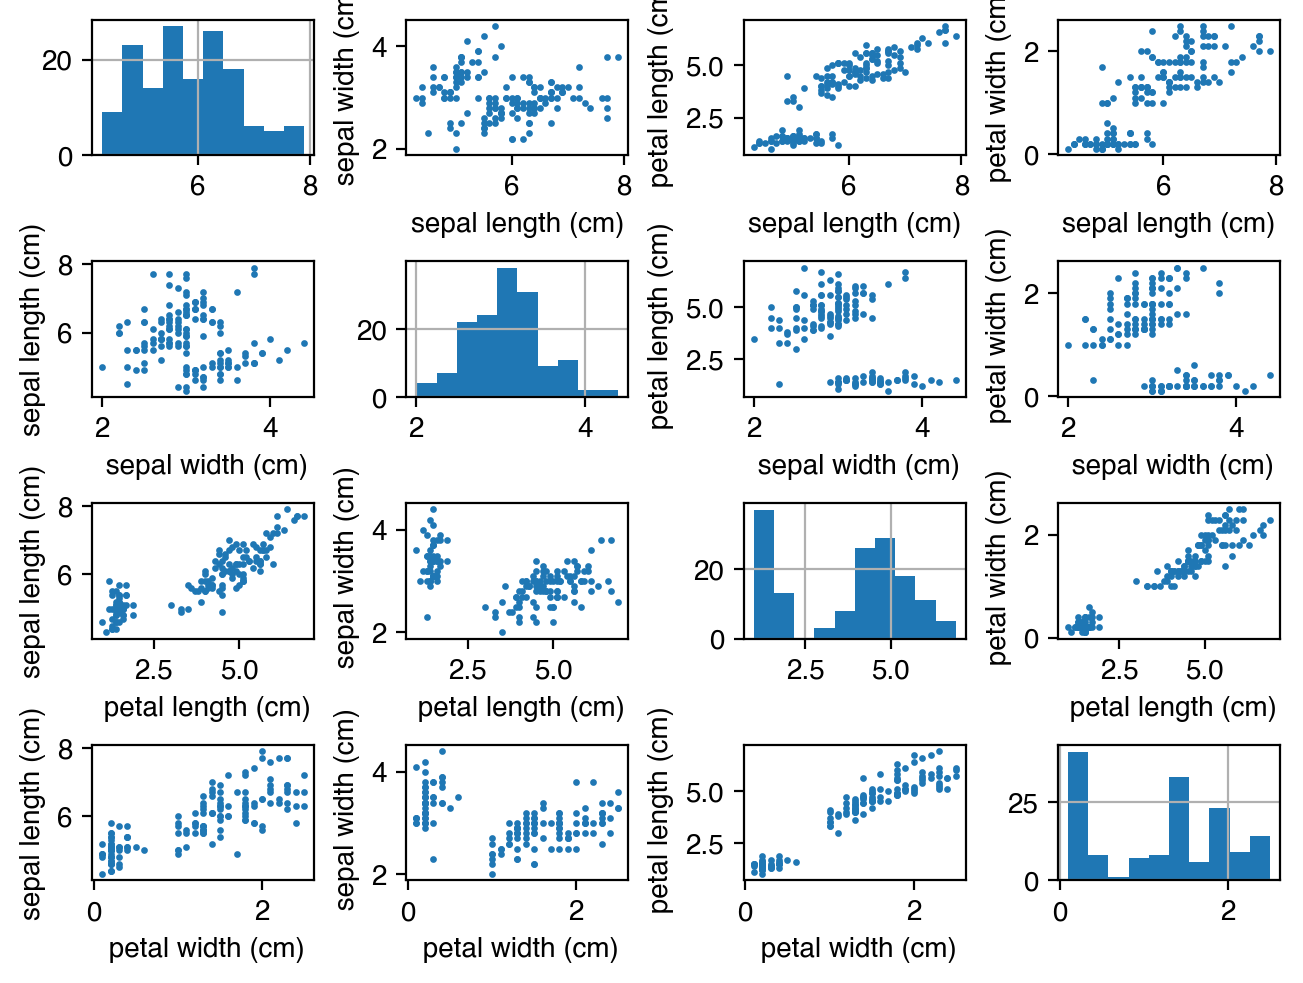

In [35]:
fig, axs = plt.subplots(4,4,layout='constrained')

# A simple scatter plot using the explicit method, but see how we index into the specific subplot

for i in range(4):
    for j in range(4):
        if i==j:
            df.iloc[:,i].hist(ax=axs[i,j])
        else:
            df.plot.scatter(x=i,y=j,s=8,marker=".",ax=axs[i,j])
            


Now, calculate the covariance of the 4 measurements:  sepal length, sepal width, petal length, and petal width.  Compare your covariance calculation to your plots.  What do you observe about these results?  

In [36]:
df.iloc[:,[0,1,2,3]].cov() # exclude the string column of species names

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.039268,1.273682,0.516904
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981
petal length (cm),1.273682,-0.321713,3.113179,1.296387
petal width (cm),0.516904,-0.117981,1.296387,0.582414


The plots suggest a more complex relationship that what we saw in class.  This is because we have three species in the full dataset, and the relative scale of each species' measurement covariances can get muddled when placed together.  For instance, in most of the scatter plots, it is easy to see at least two distinct populations are present, and the mixing of these can sometime mask what might be an underlying species-dependent relationship.  In some cases, there is still a continuity of the linear relationship (for instance, for petal width and petal length) and the overall covariance value (1.29) reflects this.  For other metrics, like sepal width and sepal length, the species-specific linear relationships mean the overall covariance is weak (-0.03).  

### Sea surface temperatures

Now, load `sst.csv` into your workspace using Pandas.  This data file consists of average December through February sea surface temperatures (SSTs) from 4 locations on the planet from 1871 through early 2016. 


In [37]:
sst = pd.read_csv("sst.csv",index_col="year") # tell Pandas that the column called 'year' is the index
sst

,eastern_pacific,north_atlantic,indian_ocean,south_atlantic
year,,,,
1871,24.760,5.0300,26.897,18.417
1872,24.593,5.0167,26.503,18.220
1873,24.040,5.0067,26.550,17.483
1874,23.727,5.0933,26.500,18.077
1875,24.353,5.1933,26.723,17.473
...,...,...,...,...
2012,24.600,5.0200,27.033,19.327
2013,24.743,5.5333,27.990,18.510
2014,24.750,5.4267,27.233,18.887


First, create a line plot using Matplotlib and showing each of the times series, plotted as a function of time in the x-axis and SST value on the y-axis.  Be sure to label your axes and create a legend so that the lines can be identified.  Since each of the time series has a different mean and variance, you may decide to normalize them first (that is, remove the mean and potentially set the variance to 1 so that you are just looking at deviation from the long-term mean values of each data series), if you wish.

Text(0.5, 1.0, 'SST Anomalies')

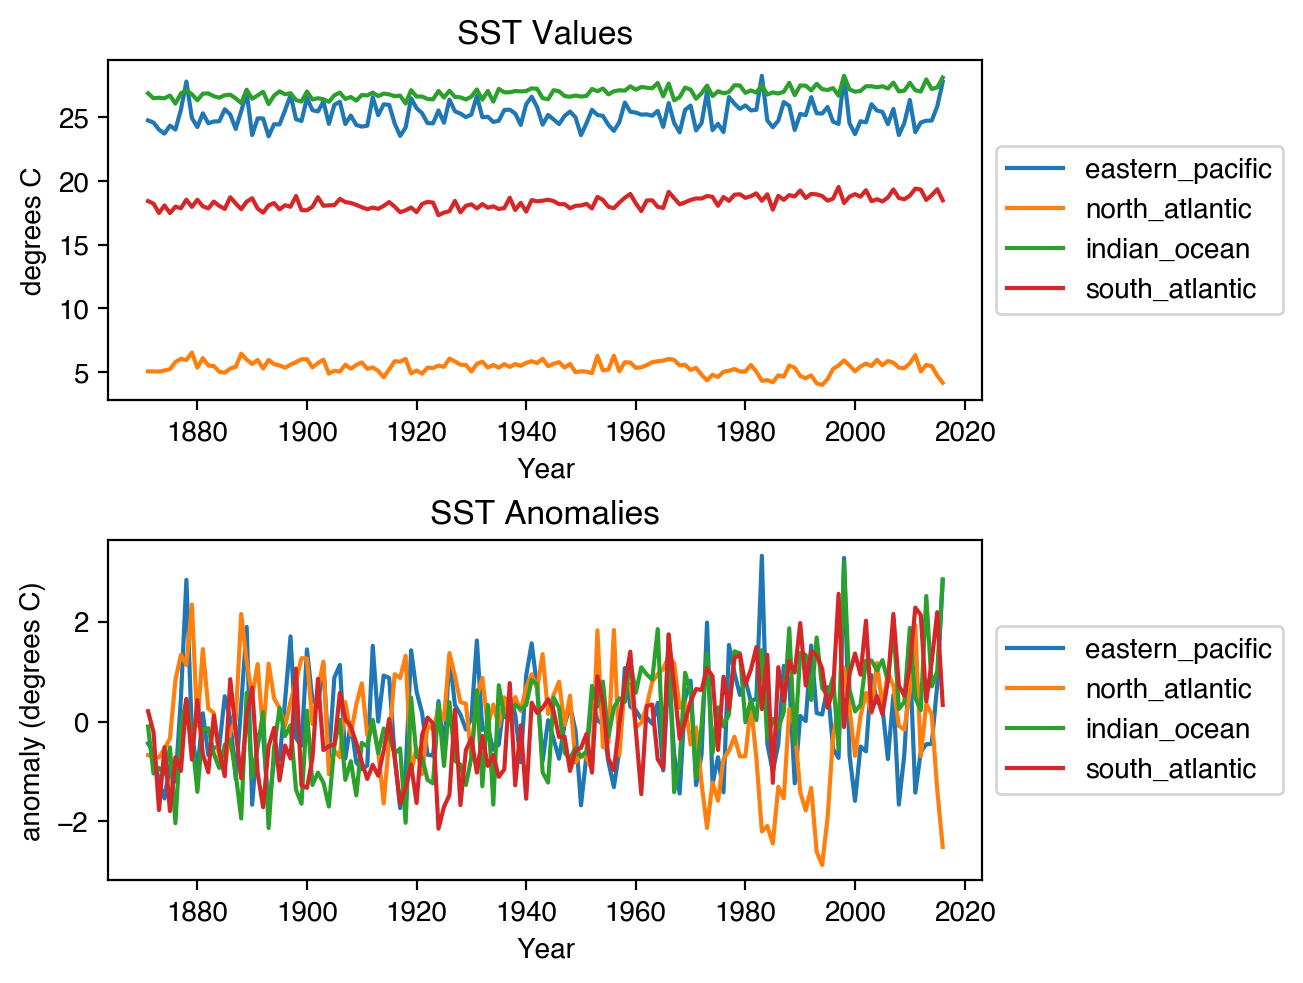

In [38]:
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(sst.index,sst.values,label=sst.columns.values)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('degrees C')
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
axs[0].set_title('SST Values')

axs[1].plot(sst.index,sst.apply(zscore).values,label=sst.columns.values)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('anomaly (degrees C)')
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
axs[1].set_title('SST Anomalies')

Alternatively, since our data are in a Pandas DataFrame, we have an alternative and somewhat (?) simpler syntax we can use:

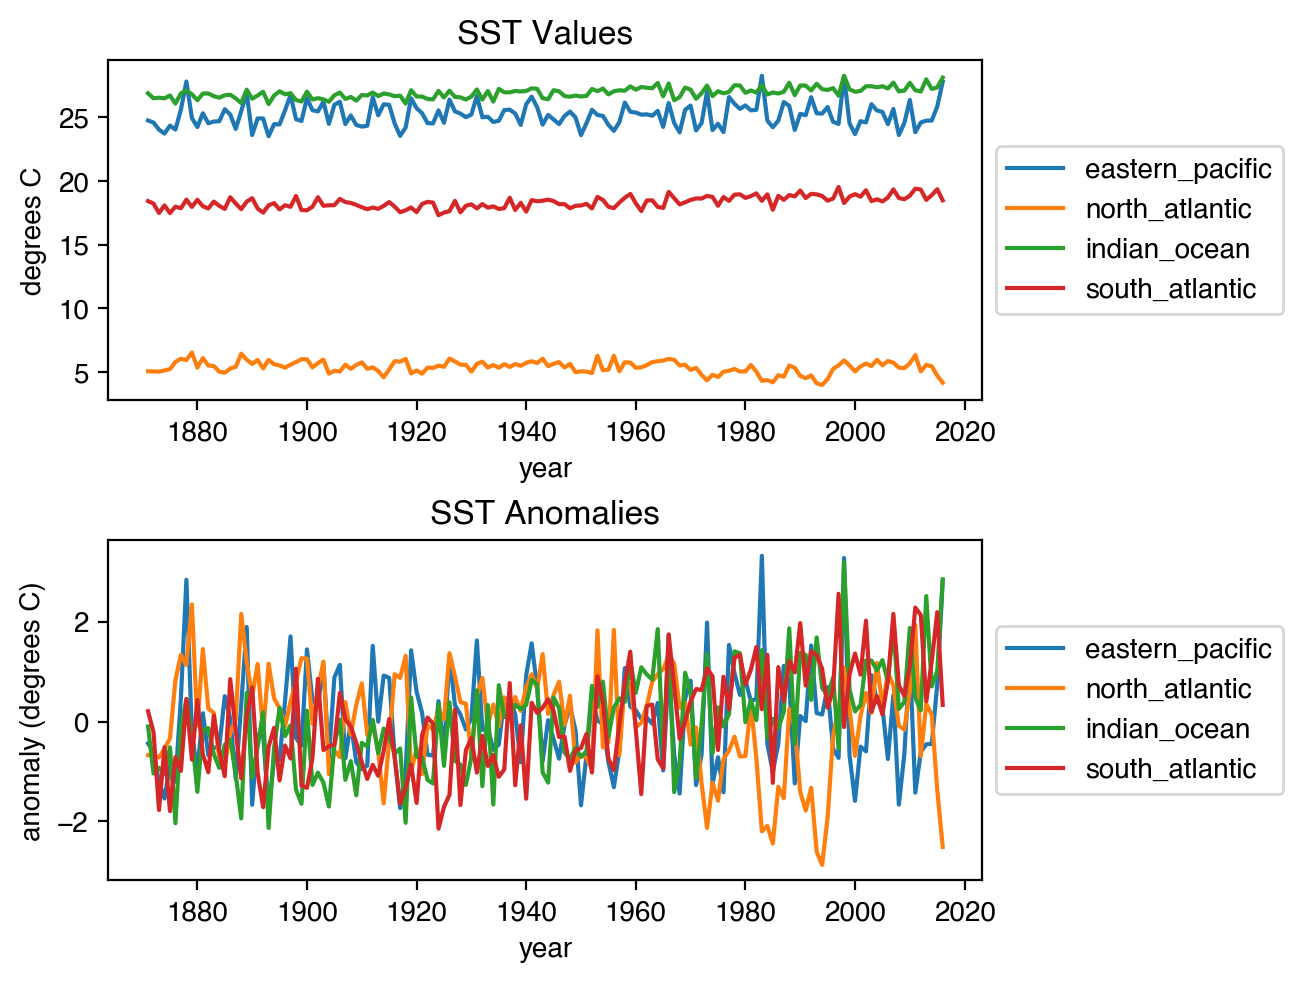

In [39]:
fig, axs = plt.subplots(2,1,layout='constrained')
sst.plot(use_index=True,ax=axs[0],ylabel='degrees C',title='SST Values')
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

from scipy.stats import zscore
sst.apply(zscore).plot(use_index=True,ax=axs[1],ylabel='anomaly (degrees C)',title='SST Anomalies')
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 



Now, calculate a covariance matrix of the SST time series from the four locations using just basic matrix calculations:

In [40]:
sst_array = sst.to_numpy() # will exclude the index, which is the years

sst_array_centered = sst_array - np.mean(sst_array,axis=0)

sst_cov = (sst_array_centered.T @ sst_array_centered) * (1/(sst_array_centered.shape[0]-1))
sst_cov

array([[ 0.87747778, -0.04378729,  0.19982561,  0.02525462],
       [-0.04378729,  0.24029316, -0.03532822, -0.0418447 ],
       [ 0.19982561, -0.03532822,  0.17553059,  0.07248504],
       [ 0.02525462, -0.0418447 ,  0.07248504,  0.22347692]])

**Question 4b. Which locations have the largest positive covariance? How do you interpret this in terms of the simultaneous SSTs at these locations?** 

The largest positive covariances are between the eastern Equatorial Pacific and the western Indian Ocean. I interpret this to mean that the temporal patterns, the year-to-year variable at these locations is similar

**Question 4c. Which locations have the largest negative covariance? How do you interpret this in terms of the simultaneous SSTs at these locations?**

The largest negative covariances, although they are not very large, are between the North Atlantic and the eastern Equatorial Pacific, western Pacific and the South Atlantic. I interpret these to indicate that when the North Atlantic is warm, the western Indian, eastern Equatorial, and %outh Atlantic are cold, and vice versa, although the relationships are relatively weak.

**Question 4d. Which locations have covariances closest to zero? How do you interpret this in terms of the simultaneous SSTs at these locations?**

The weakest relationship is between the eastern Equatorial Pacific and the South Atlantic. I interpret this to mean these regions share little common signal, either positive or negative



Verify you correctly calculated the covariance matrix by performing the same calculation using `np.cov` or, alternatively, you can return to use Pandas functionality for this


In [48]:
print(np.cov(sst_array,rowvar=False)) # this will work on the Numpy array, but lacks the columns and row labels that make Pandas easier to interpret, so ... 

# sst.loc[:,sst.columns != 'year'].cov() # clunky way to exclude the 'year' column if you didn't use it as the index, but we did, so ... 

# simpler way using Pandas
sst.cov() 

[[ 0.87747778 -0.04378729  0.19982561  0.02525462]
 [-0.04378729  0.24029316 -0.03532822 -0.0418447 ]
 [ 0.19982561 -0.03532822  0.17553059  0.07248504]
 [ 0.02525462 -0.0418447   0.07248504  0.22347692]]


,eastern_pacific,north_atlantic,indian_ocean,south_atlantic
eastern_pacific,0.877478,-0.043787,0.199826,0.025255
north_atlantic,-0.043787,0.240293,-0.035328,-0.041845
indian_ocean,0.199826,-0.035328,0.175531,0.072485
south_atlantic,0.025255,-0.041845,0.072485,0.223477


As we discussed in lecture, related to the calculation of covariance is _correlation_ - which also tells you something about the association between two time series over their common period of overlap (or, alternatively, you may have reason to look at correlation when the series are lagged in time relative to one another).  Correlation coefficients, however, are normalized such that they are always between -1 and 1, irrespective of the variance or mean of the datasets being considered.  As with most things in Python, there are multiple ways to calculate a correlation, and I showed you three ways to do so in class.   

While NumPy does have a correlation function which is sufficient for this exercise, `numpy.corrcoef`, it doesn't provide a significance level ($p-value$).  For applications where you need to assess significance then, I recommend using `scipy.stats.pearsonr`` or adopting the combination of Pandas and SciPy I showed in the notebook in class. [You can see the manual page for the SciPy Pearson correlation function here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)  Notice that this function returns a single object (not 2 separate values), which contains the correlation coefficient in position [0] and the p-value for significance in position [1]. 

With all that said, please now calculate the correlation matrix for the SST data used in this problem.  We can use Pandas again here since all I asked for was the coefficients, not the significance levels. How does it compare to the covariance matrix you calculated above? 


In [42]:
sst.corr()

,eastern_pacific,north_atlantic,indian_ocean,south_atlantic
eastern_pacific,1.000000,-0.095358,0.509163,0.057030
north_atlantic,-0.095358,1.000000,-0.172018,-0.180573
indian_ocean,0.509163,-0.172018,1.000000,0.365979
south_atlantic,0.057030,-0.180573,0.365979,1.000000


Once again, but perhaps with a bit more clarity, we can see the strongest relationshops between the eastern Pacific Ocean and (western) Indian Ocean ($r=0.51$).  We can also now see the relationship (weaker, $r=0.37$) between that South Atlantic and Indian Ocean.  The largest negative correlation is somewhat weak ($r=-0.18$) betwen North and South Atlantic.  There is little association between Pacific and Atlantic. 

## Anscombe's Quartet 

 Finally, you'll use the following data set called [Anscombe's Quartet](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966) to observe how very different datasets can have similar statistical characteristics, including their mean, variance, and correlation

Here are the data:

In [43]:
del x # we had an x and y before, so let's make sure they don't interfere
del y

x = np.array([
    [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]])

y = np.array([
    [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
    [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]])


In Anscombe's Quartet, each of the 4 rows of $x$ is meant to be paired with the corresponding row from $y$.  I'd like you to investigate these.  Please do the following calculations and respond to the following queries:

First, calculate the row-wise (e.g. of each row) mean for both $x$ and $y$ (hint: you should get 4 mean values corresponding to the 4 rows for $x$ and $y$ - if you use a `np.mean` function, you'll need to specify the `axis` to perform the calculation across the correct dimension.  

In [44]:
print(np.mean(x,axis=1))
print(np.mean(y,axis=1))

[9. 9. 9. 9.]
[7.50090909 7.50090909 7.5        7.50090909]


**What do you observe about the 4 mean values for $x$? What do you observe about the 4 mean values of $y$?**

The rows of $x$ have the same mean values and the rows of $y$ have the same mean values. 


Now, calculate the row-wise _variance_ for both $x$ and $y$ (hint: you should get 4 variance values corresponding to the 4 rows for $x$ and $y$ - if you use a `np.var` function, you'll need to specify the `axis` to perform the calculation across the appropriate dimension.  


In [45]:
print(np.var(x,axis=1,ddof=1))
print(np.var(y,axis=1,ddof=1))

[11. 11. 11. 11.]
[4.12726909 4.12762909 4.12262    4.12324909]


**What do you observe about the 4 variance values for $x$? What do you observe about the 4 variance values of $y$?**

The rows of $x$ have the same variance values and the rows of $y$ have nearly the same variance values. 

Now, calculate the Pearson product moment correlation for each pair of rows from $x$ and $y$. The Jupyter notebook on covariance and correlation provide various ways to approach this calculation (NB: there are lots of ways you might do this, some more efficient than others).  Since I didn't ask for a significance value here, you can use `np.corrcoef`, for instance.


In [46]:
res = []
for i in range(4):
    r = np.corrcoef(x=x[i,:],y=y[i,:])[0][1]
    res.append(r)

print(res)

[0.81642051634484, 0.8162365060002428, 0.8162867394895984, 0.8165214368885028]


Notice the Pearson correlation coefficients are the same for each paired $x$ and $y$ row.

Finally, use Matplotlib to plot each set of paired x and y values (e.g. the matching values from each pair of rows) in 1 panel in a 4 panel figure.  


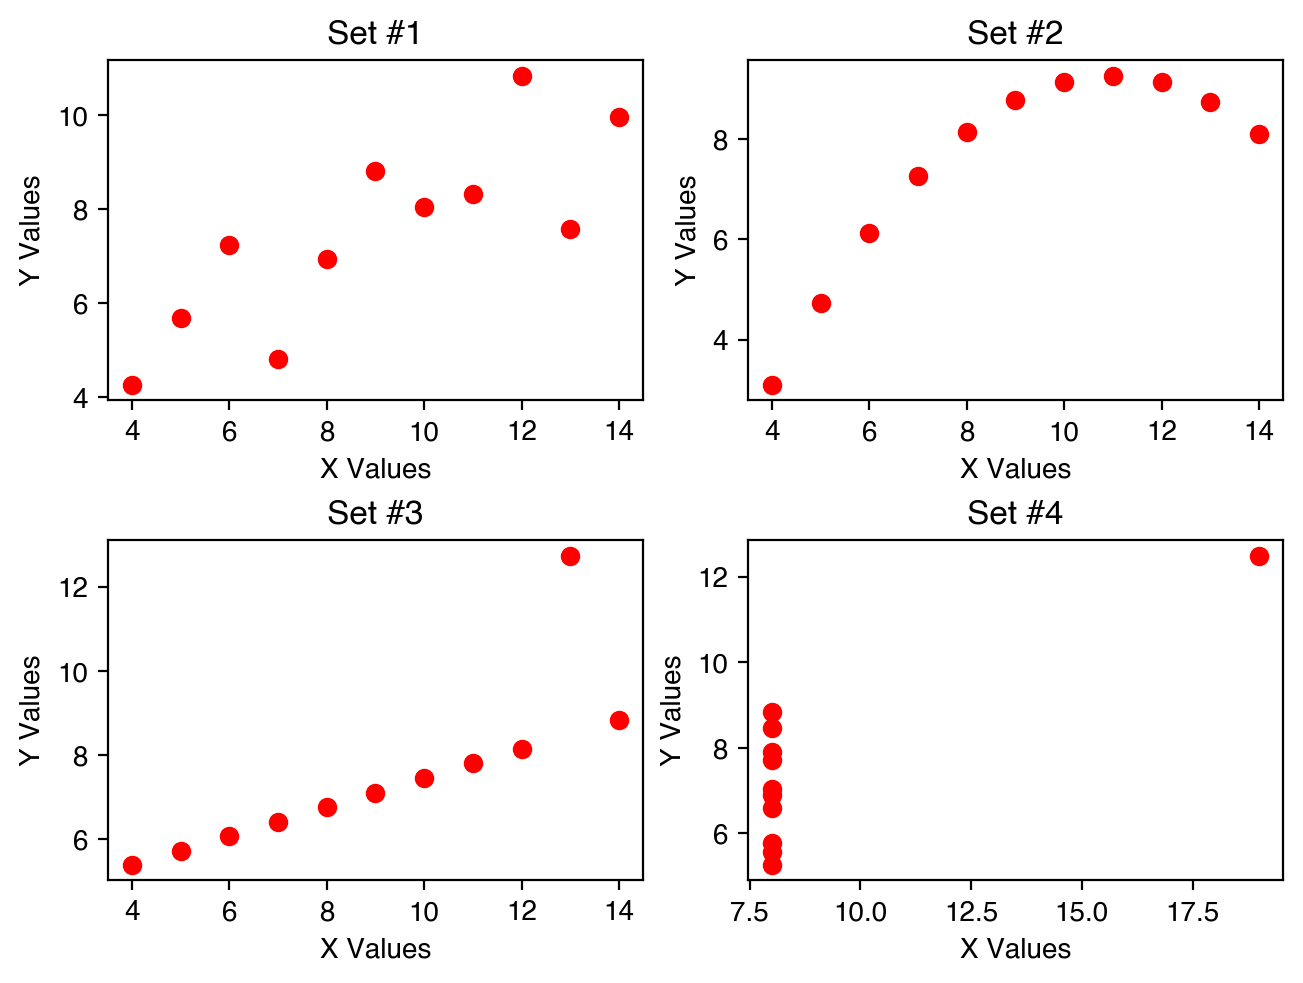

In [47]:
fig, axs = plt.subplots(2,2,layout='constrained')
axs = axs.flatten()

for i in range(4):
    axs[i].scatter(x[i,:],y[i,:],color="red")
    axs[i].set_title("Set #"+str(i+1))
    axs[i].set_xlabel("X Values")
    axs[i].set_ylabel("Y Values")



 **Reflecting on what you calculated and observed above and observing now your plots, can you make a general statement about the need to be careful when evaluating correlation values?**

 A single number like the correlation coefficient may be insufficient for describing the underlying structure and relationships in the data.  It is still incument on us as scientists to be aware of the characteristics of our data and any limitations on the inferences we can draw from statistics. 

If you're interested, there is a Matplotlib page specifically about [Anscombe's Quartet](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html).